## MVP: Result Analyis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


### Load results

**Source:** Train and test with youtube data

In [2]:
result_10 = pd.read_csv('../../../Source/Data/Results_n10.csv').drop(['Unnamed: 0'], axis=1)
result_20 = pd.read_csv('../../../Source/Data/Results_n20.csv').drop(['Unnamed: 0'], axis=1)
result_30 = pd.read_csv('../../../Source/Data/Results_n30.csv').drop(['Unnamed: 0'], axis=1)
result_40 = pd.read_csv('../../../Source/Data/Results_n40.csv').drop(['Unnamed: 0'], axis=1)
result_50 = pd.read_csv('../../../Source/Data/Results_n50.csv').drop(['Unnamed: 0'], axis=1)
result_60 = pd.read_csv('../../../Source/Data/Results_n60.csv').drop(['Unnamed: 0'], axis=1)
result_70 = pd.read_csv('../../../Source/Data/Results_n70.csv').drop(['Unnamed: 0'], axis=1)
result_80 = pd.read_csv('../../../Source/Data/Results_n80.csv').drop(['Unnamed: 0'], axis=1)
result_90 = pd.read_csv('../../../Source/Data/Results_n90.csv').drop(['Unnamed: 0'], axis=1)
result_100 = pd.read_csv('../../../Source/Data/Results_n100.csv').drop(['Unnamed: 0'], axis=1)
result_128 = pd.read_csv('../../../Source/Data/Results_n128.csv').drop(['Unnamed: 0'], axis=1)

From the results, we see that the test observation at index 1 was always missclassified.
<br/> Let's examine the probablities to see by how much each test was off.

In [3]:
result_10

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
0,0,0,8.303252e-01,0,0.684
1,0,1,4.130023e-10,1,0.378
2,1,1,8.895908e-04,1,0.242
3,0,0,9.561106e-01,1,0.492
4,1,0,7.815561e-01,1,0.392


In [4]:
result_10.iloc[1,2], result_10.iloc[1,4]

(4.130022990267434e-10, 0.37799999999999995)

In [5]:
lr_prob, rf_prob = [], []
df_list = [result_10, result_20, result_30, result_40, result_50, 
           result_60, result_70, result_80, result_90, result_100, result_128]

In [6]:
for df in df_list:
    lr_prob.append(df.iloc[1,2])
    rf_prob.append(df.iloc[1,4])   

In [7]:
prob_sample_1 = pd.DataFrame({'LogReg': lr_prob, 'RdmFst': rf_prob})
prob_sample_1= prob_sample_1.set_index([[10,20,30,40,50,60,70,80,90,100,128]])

In [8]:
prob_sample_1

,LogReg,RdmFst
10,4.130023e-10,0.378
20,5.689643e-09,0.360
30,1.018999e-08,0.314
40,3.533965e-08,0.206
50,3.279950e-08,0.180
60,3.568288e-08,0.214
70,3.618687e-08,0.192
80,4.174278e-08,0.256
90,4.408176e-08,0.272
100,4.418536e-08,0.326


Since the true value is 0, we're looking for which test has a higher probability of 0 (bigger number).

In [9]:
prob_sample_1.max()

LogReg    4.959936e-08
RdmFst    3.780000e-01
dtype: float64

These values correspond to:
- Logistic Regression with 128 (maximum) coefficients
- Random Forest with 10 (minimum sampled) coefficients

Now let's examine the **accuracy scores** for all of these.

In [10]:
lr_acc, rf_acc = [], []

In [11]:
for df in df_list:
    lr_acc.append(accuracy_score(df['True'], df['Predict_lr']))
    rf_acc.append(accuracy_score(df['True'], df['Predict_rf']))   

In [12]:
accuracy = pd.DataFrame({'LogReg': lr_acc, 'RdmFst': rf_acc})
accuracy= accuracy.set_index([[10,20,30,40,50,60,70,80,90,100,128]])

In [13]:
accuracy

,LogReg,RdmFst
10,0.6,0.6
20,0.8,0.8
30,0.8,0.6
40,0.8,0.6
50,0.8,0.8
60,0.8,0.8
70,0.8,0.8
80,0.8,0.8
90,0.8,0.8
100,0.8,0.8


This is *interesting*. <br/>With logistic regression, the accuracy improves and stays consistant with increasing values of n_ coefficients. <br/> But with the random forest, it improves, then gets worse, before ultimately getting better and staying consistant. <br/>Does this make sense logically?

Is there a correlation between accuracy and probability of predicting the problematic test sample at index 1?

In [14]:
acc_prob_df = pd.concat([prob_sample_1, accuracy], axis=1)
acc_prob_df

,LogReg,RdmFst,LogReg,RdmFst
10,4.130023e-10,0.378,0.6,0.6
20,5.689643e-09,0.360,0.8,0.8
30,1.018999e-08,0.314,0.8,0.6
40,3.533965e-08,0.206,0.8,0.6
50,3.279950e-08,0.180,0.8,0.8
60,3.568288e-08,0.214,0.8,0.8
70,3.618687e-08,0.192,0.8,0.8
80,4.174278e-08,0.256,0.8,0.8
90,4.408176e-08,0.272,0.8,0.8
100,4.418536e-08,0.326,0.8,0.8


- Logistic Regression: 128 coefficients: accuracy 80%
- Random Forest: 10 coefficients: accuracy 60%

Perhaps there is some correlation with logistic regression. But that isn't the case for random forest.

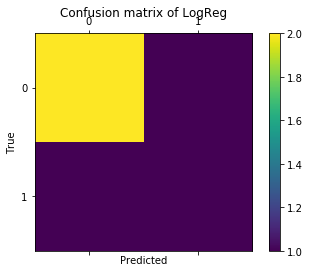

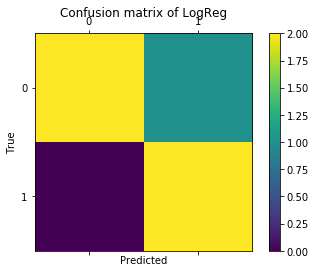

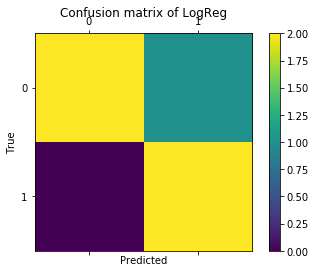

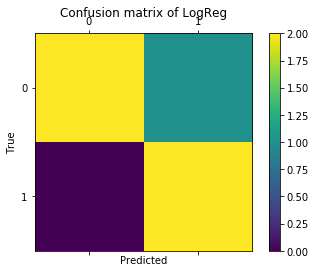

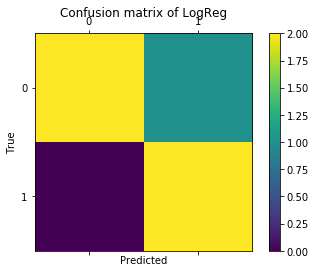

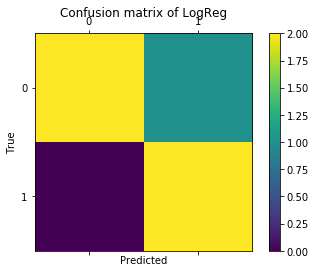

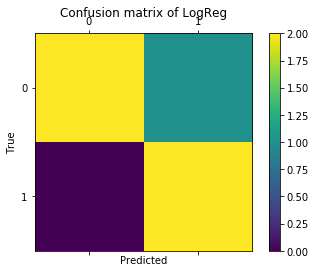

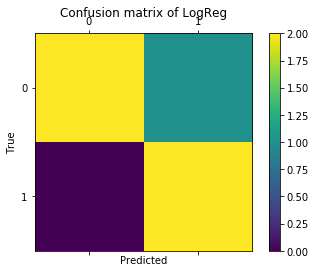

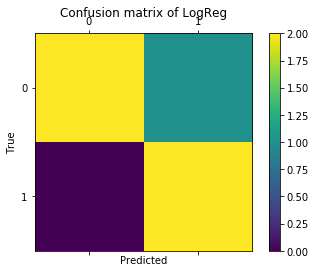

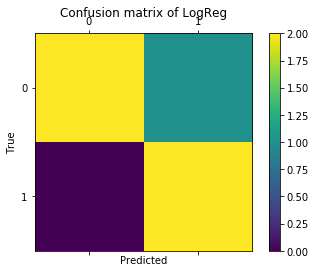

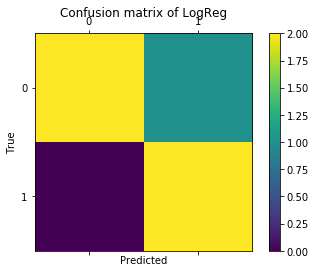

In [15]:
labels = [0, 1]
n_list = [10,20,30,40,50,60,70,80,90,100,128]
for df in df_list:
    y_test = df['True']
    pred = df['Predict_lr']
    
    cm = confusion_matrix(y_test, pred, labels)
    #print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of LogReg')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()